In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette='colorblind')
sns.set_style("whitegrid")
sns.set_context("talk")

In [2]:
df = pd.read_csv("binary_adult_results.csv")


In [3]:
df1 = pd.read_csv("no_fs_binary_adult_results.csv")
df1['model_type'].unique()

array(['base_model', 'fair_model'], dtype=object)

In [4]:
df2 = pd.read_csv("new_fsfs_binary_adult.csv")
df2['model_type'].unique()

array(['base_model', 'fair_model'], dtype=object)

In [5]:

frames = [df, df1, df2]

data = pd.concat(frames)
data['model_type'].unique()

array(['base_model', 'fair_model'], dtype=object)

In [6]:
data['fs'] = data['technique'].str.split(' ').apply(pd.Series)[1]

In [7]:
data = data.replace(['maximally_predictive_minimally_demographic','sequential_feature_selection_backward',
    'sequential_feature_selection_forward', 'xy_greater_xa','no_fselection','sequential_fs'], 
                  ['MPMD','bsfs','fsfs','xy>xa','no_fs','lr_fsfs'])


In [8]:
data['fs'].unique()

array(['MPMD', 'bsfs', 'fsfs', 'xy>xa', 'no_fs', 'lr_fsfs'], dtype=object)

In [9]:
data['model_type'].unique()


array(['base_model', 'fair_model'], dtype=object)

In [10]:
df = data.copy()

df = df[df.eta != 30]
df = df[df.eta != 1]
df = df[df.eta != 20]

In [11]:
df['eta'].unique()

array([nan, 10.])

In [12]:
df.columns

Index(['Unnamed: 0', 'data', 'features_cat', 'features_num',
       'protected_attributes', 'p_att_description', 'target', 'etas',
       'feat_dictionary', 'technique', 'model', 'dir_name', 'model_type',
       'disparate_impact', 'statistical_parity_difference',
       'equal_opportunity_difference', 'accuracy', 'eta', 'fs'],
      dtype='object')

In [14]:
df.head()

,Unnamed: 0,data,features_cat,features_num,protected_attributes,p_att_description,target,etas,feat_dictionary,technique,model,dir_name,model_type,disparate_impact,statistical_parity_difference,equal_opportunity_difference,accuracy,eta,fs
0,0,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', ...",income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function base_classifier at 0x7fcc3d48a440>,adult_maximally_predictive_minimally_demograph...,base_model,0.480229,-0.074947,-0.046280,0.798010,NaN,MPMD
1,0,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('marital-status', ['Married-civ-spouse'])",income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function base_classifier at 0x7fcc3d48a440>,adult_maximally_predictive_minimally_demograph...,base_model,0.375549,-0.093383,0.092175,0.798010,NaN,MPMD
2,0,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('race', ['White'])",income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function base_classifier at 0x7fcc3d48a440>,adult_maximally_predictive_minimally_demograph...,base_model,0.595248,-0.061716,-0.059123,0.814151,NaN,MPMD
3,0,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('sex', [1])",income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function base_classifier at 0x7fcc3d48a440>,adult_maximally_predictive_minimally_demograph...,base_model,0.479924,-0.073731,-0.048759,0.798673,NaN,MPMD
5,1,<__main__.NamedDataset object at 0x7fcc3d45b3d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', ...",income-per-year,"[1, 10, 20, 30]","{'hours-per-week': 3, 'capital-gain': 10, 'cap...",<function maximally_predictive_minimally_demog...,<function fair_classifier at 0x7fcc3d48a4d0>,adult_maximally_predictive_minimally_demograph...,fair_model,0.356930,-0.070480,-0.064453,0.801651,10.0,MPMD


In [ ]:
df['di_diff'] = (1 - df['disparate_impact']).abs()
df['sp_diff'] = (0 - df['statistical_parity_difference']).abs()
df['eod_diff'] = (0 - df['equal_opportunity_difference']).abs()
                    

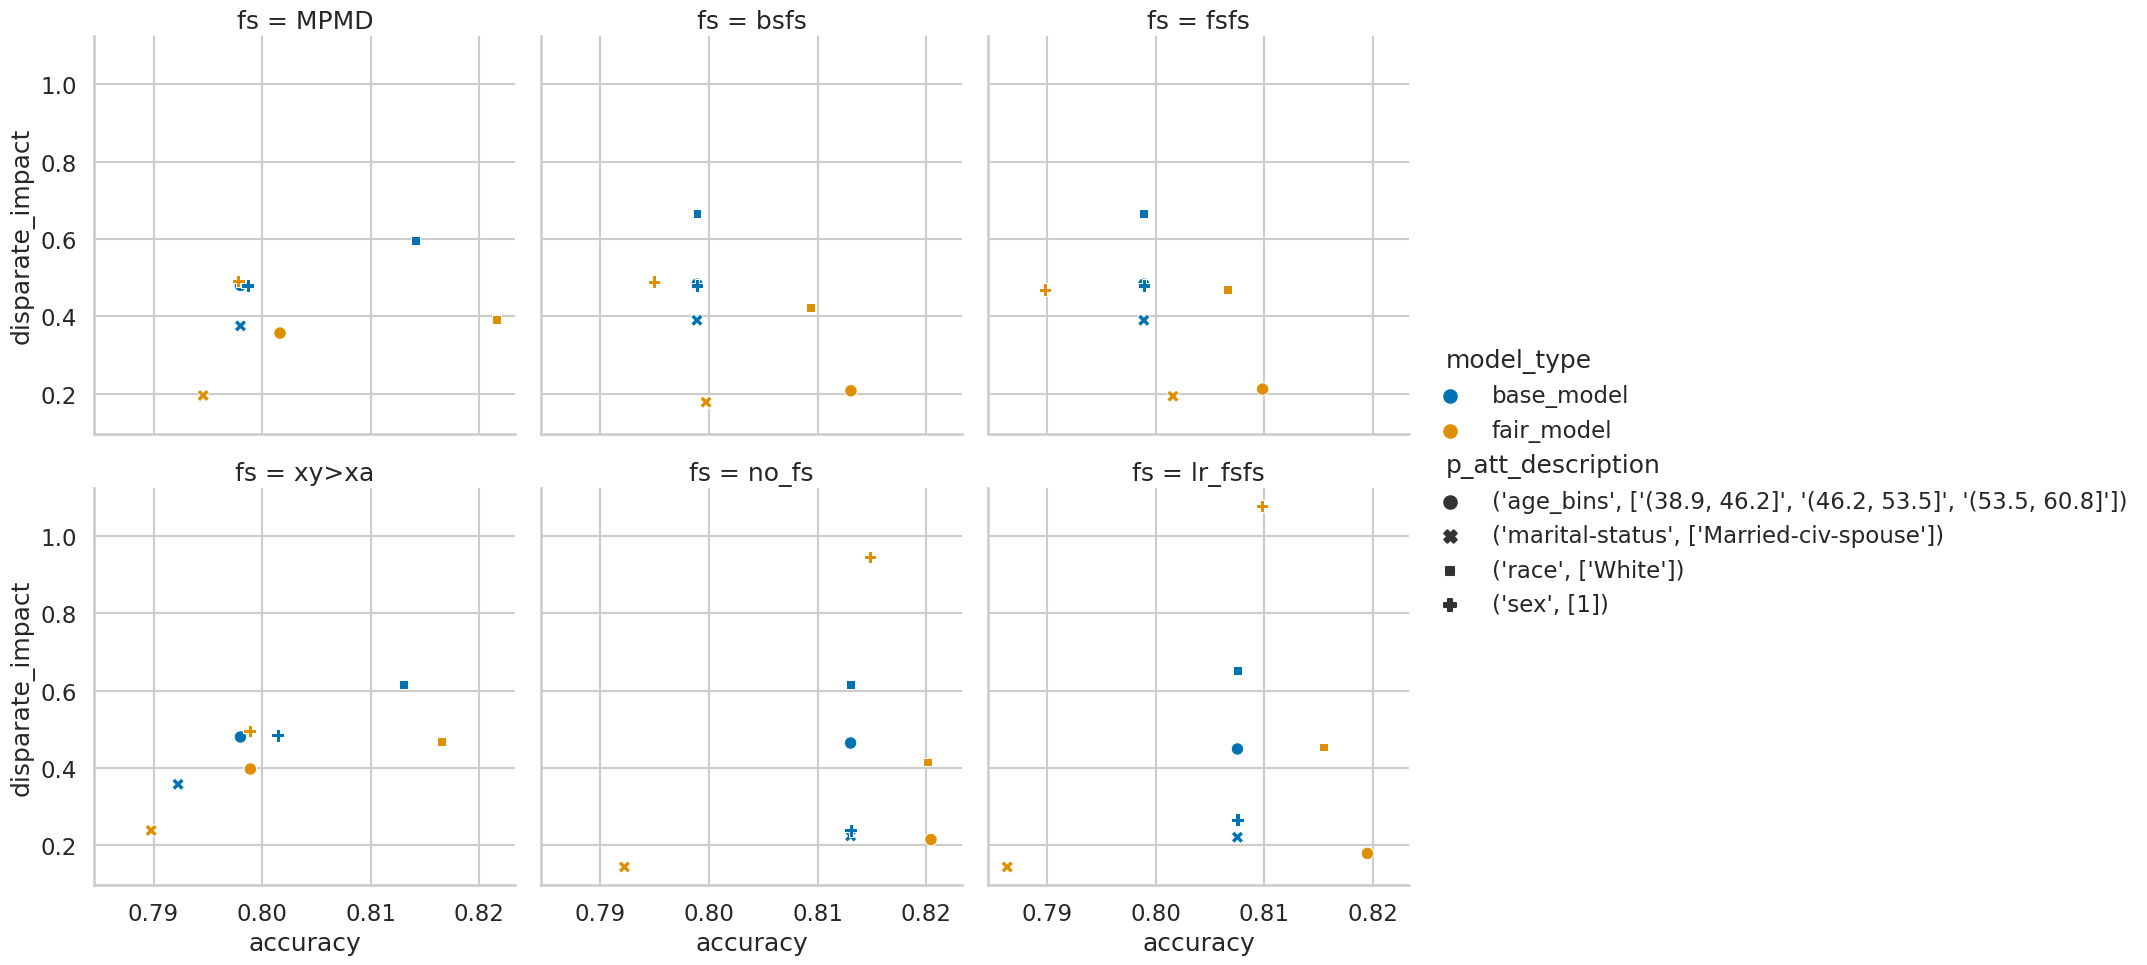

In [21]:
import matplotlib.pyplot as plt
#sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
di_adult_eta_10plot_mpmd_nofs_lrfs = sns.relplot(data = df, x = 'accuracy', y ='disparate_impact', hue='model_type', col = 'fs', 
            style = 'p_att_description', col_wrap = 3)
plt.savefig('di_adult_eta_10plot_mpmd_nofs_lrfs.png')

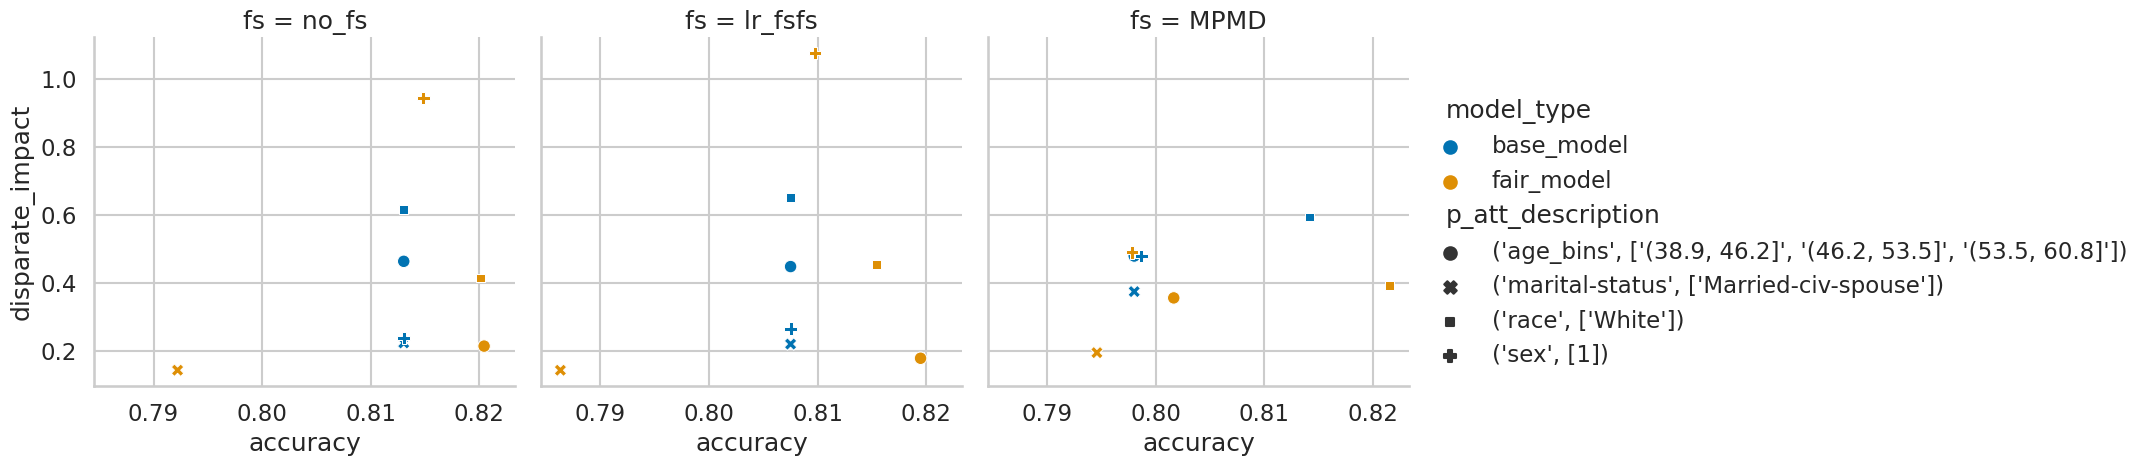

In [22]:
#df_mpmd_nofs_lrfs = df.copy()
#df_mpmd_nofs_lrfs = df_mpmd_nofs_lrfs[df_mpmd_nofs_lrfs.fs != 'fs=]
di_adult_eta_10plot_mpmd_nofs_lrfs = sns.relplot(data = df, x = 'accuracy', y ='disparate_impact', hue='model_type', col = 'fs', 
            style = 'p_att_description', col_order= ['no_fs','lr_fsfs','MPMD'])
plt.savefig('di_adult_eta_10plot_mpmd_nofs_lrfs.png')

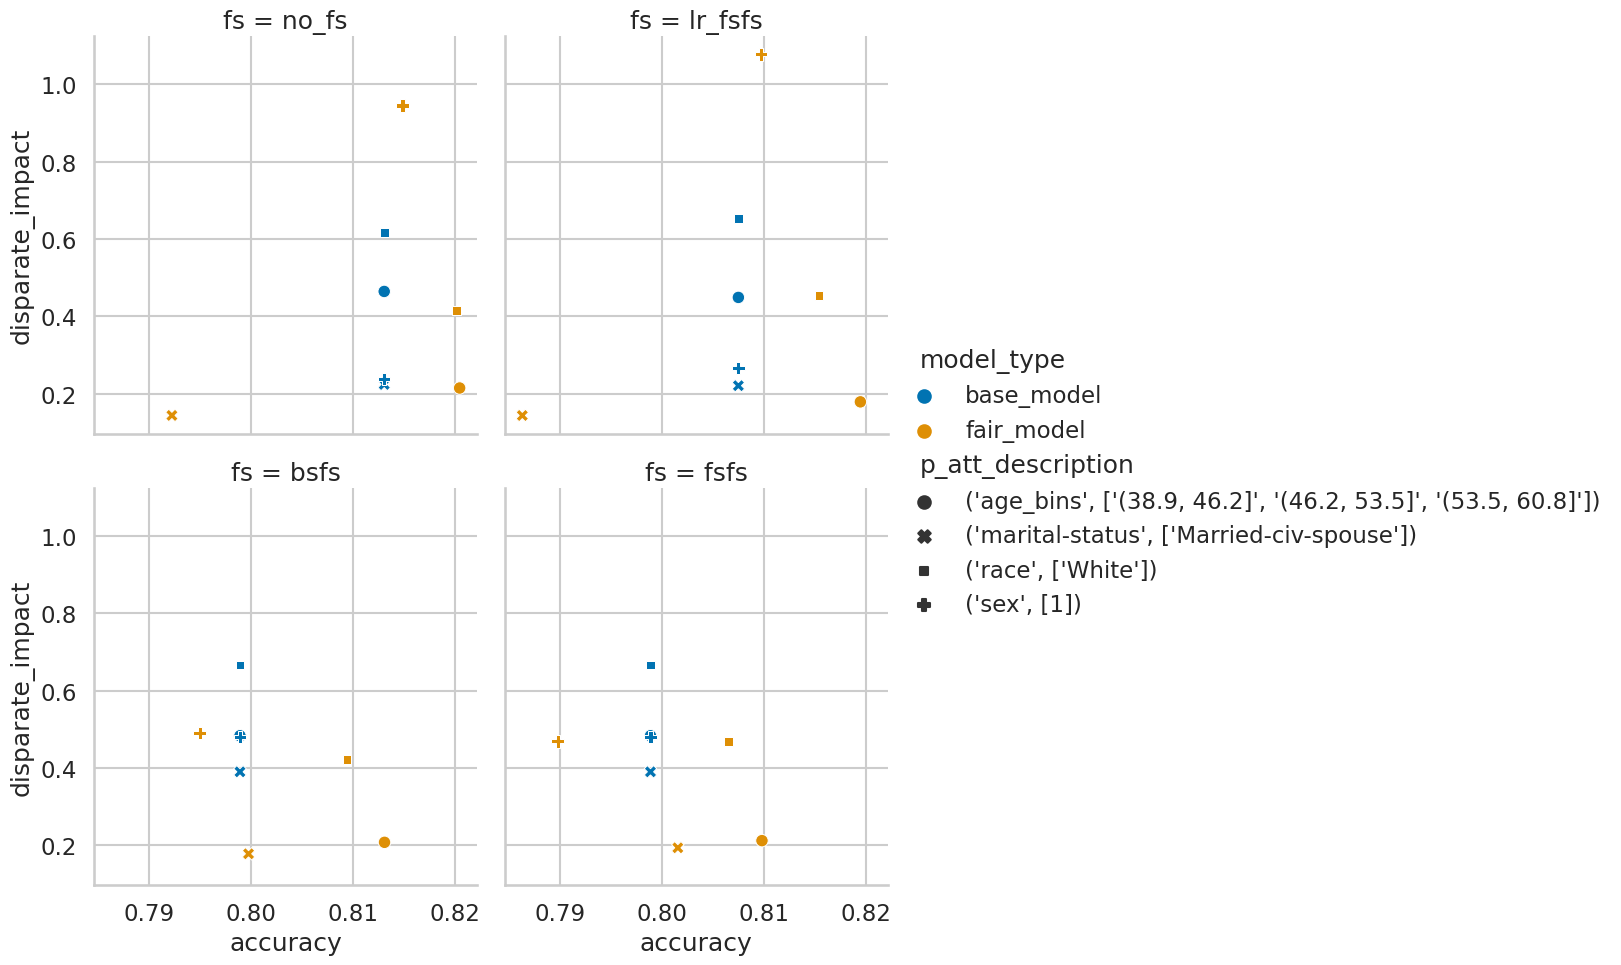

In [23]:
di_adult_eta_10plot_bfsf_nofs_lrfs = sns.relplot(data = df, x = 'accuracy', y ='disparate_impact', hue='model_type', col = 'fs', 
            style = 'p_att_description', col_order= ['no_fs','lr_fsfs','bsfs','fsfs'], col_wrap = 2)
plt.savefig('di_adult_eta_10plot_bfsf_nofs_lrfs.png')

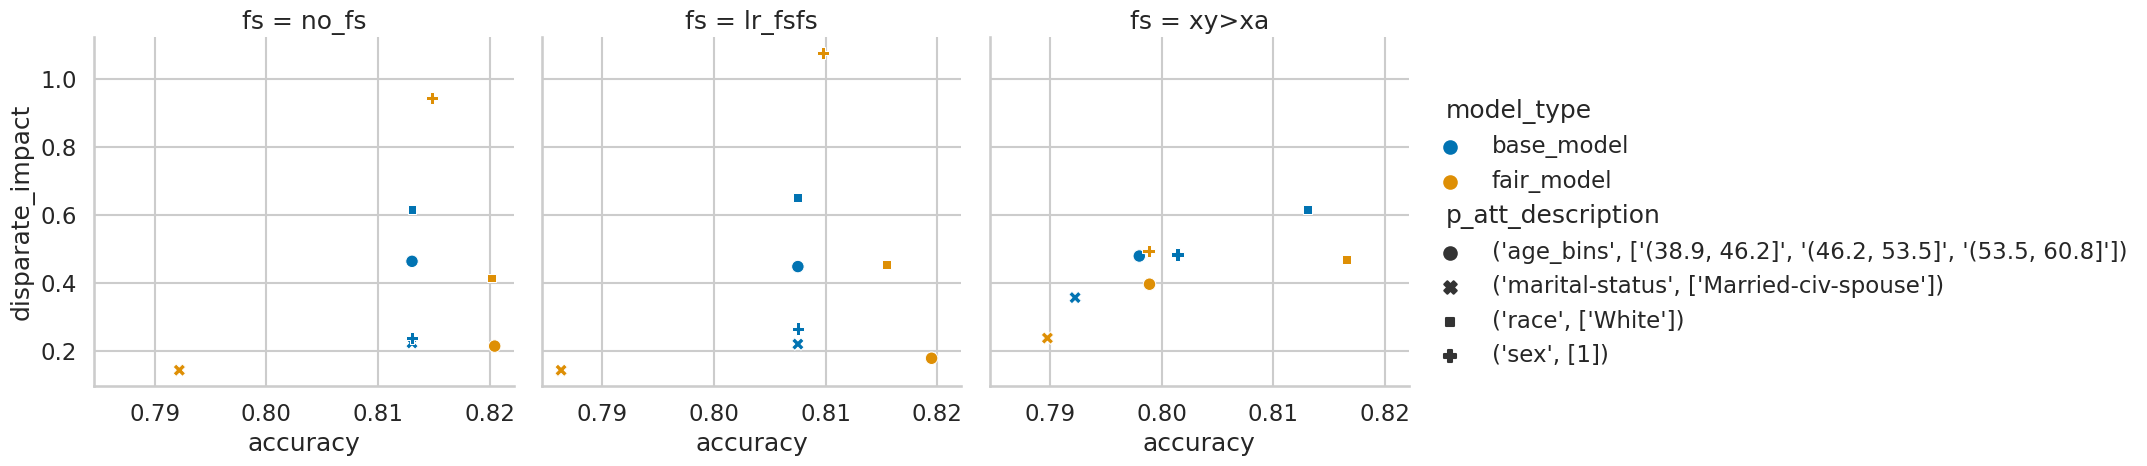

In [24]:
di_adult_eta_10plot_xyxa_nofs_lrfs = sns.relplot(data = df, x = 'accuracy', y ='disparate_impact', hue='model_type', col = 'fs', 
            style = 'p_att_description', col_order= ['no_fs','lr_fsfs','xy>xa'])
plt.savefig('di_adult_eta_10plot_xyxa_nofs_lrfs.png')

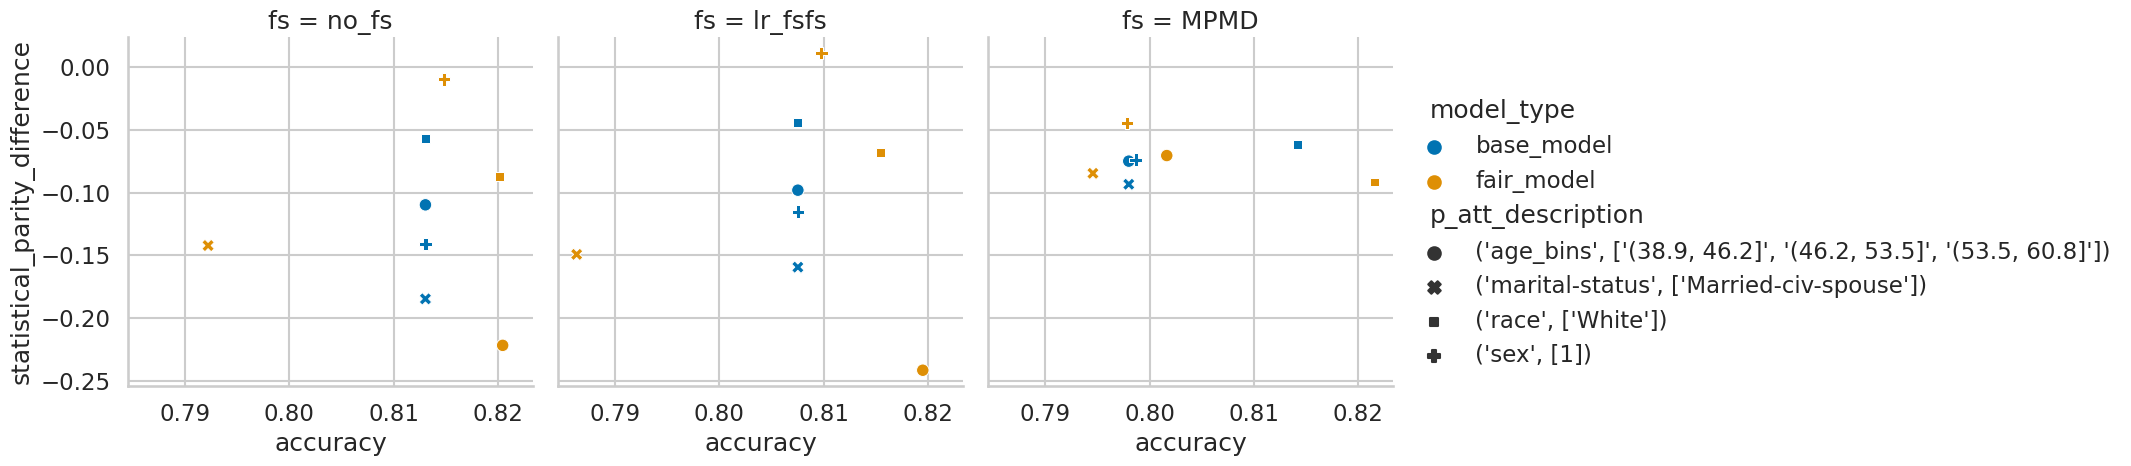

In [26]:

sp_adult_eta_10plot_mpmd_nofs_lrfs = sns.relplot(data = df, x = 'accuracy', y ='statistical_parity_difference', hue='model_type', 
            col = 'fs',style = 'p_att_description',col_order= ['no_fs','lr_fsfs','MPMD'])
plt.savefig('sp_adult_eta_10plot_mpmd_nofs_lrfs.png')

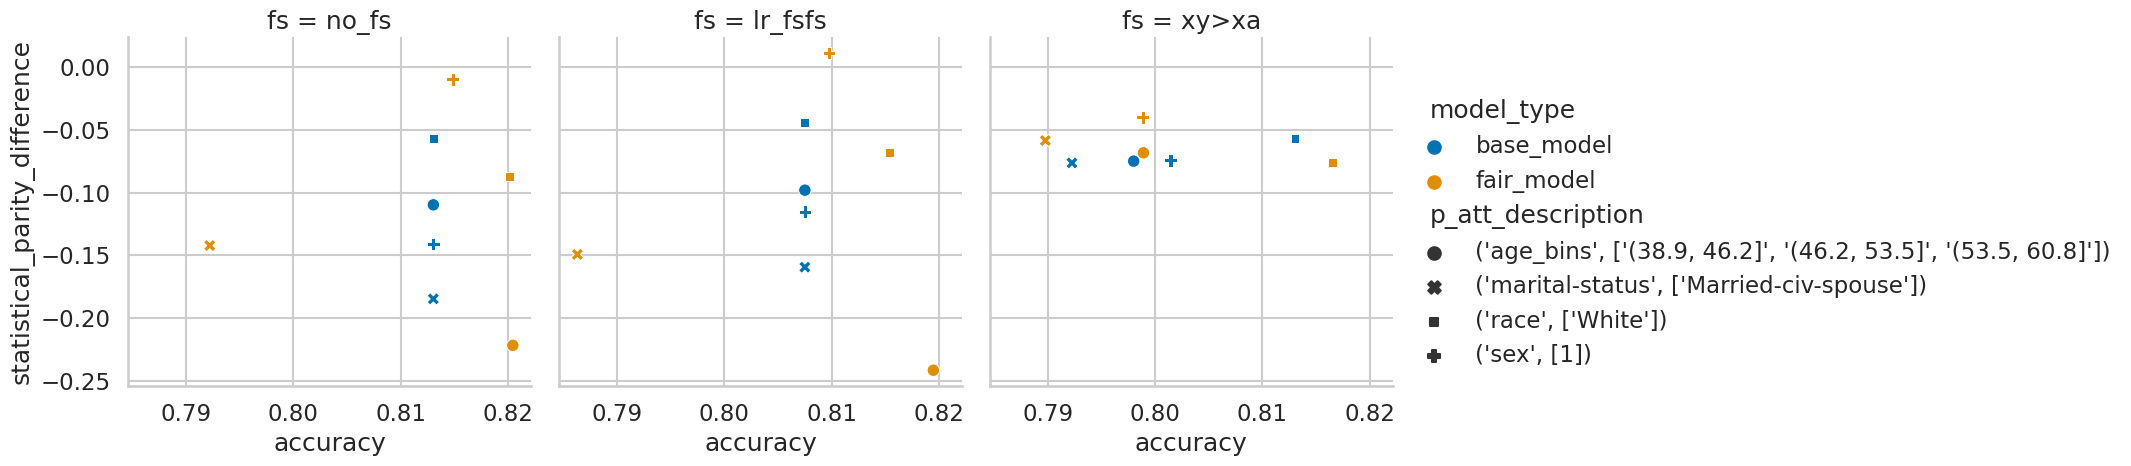

In [27]:

sp_adult_eta_10plot_xyxa_nofs_lrfs = sns.relplot(data = df, x = 'accuracy', y ='statistical_parity_difference', hue='model_type', 
            col = 'fs',style = 'p_att_description', col_order= ['no_fs','lr_fsfs','xy>xa'])
plt.savefig('sp_adult_eta_10plot_xyxa_nofs_lrfs.png')


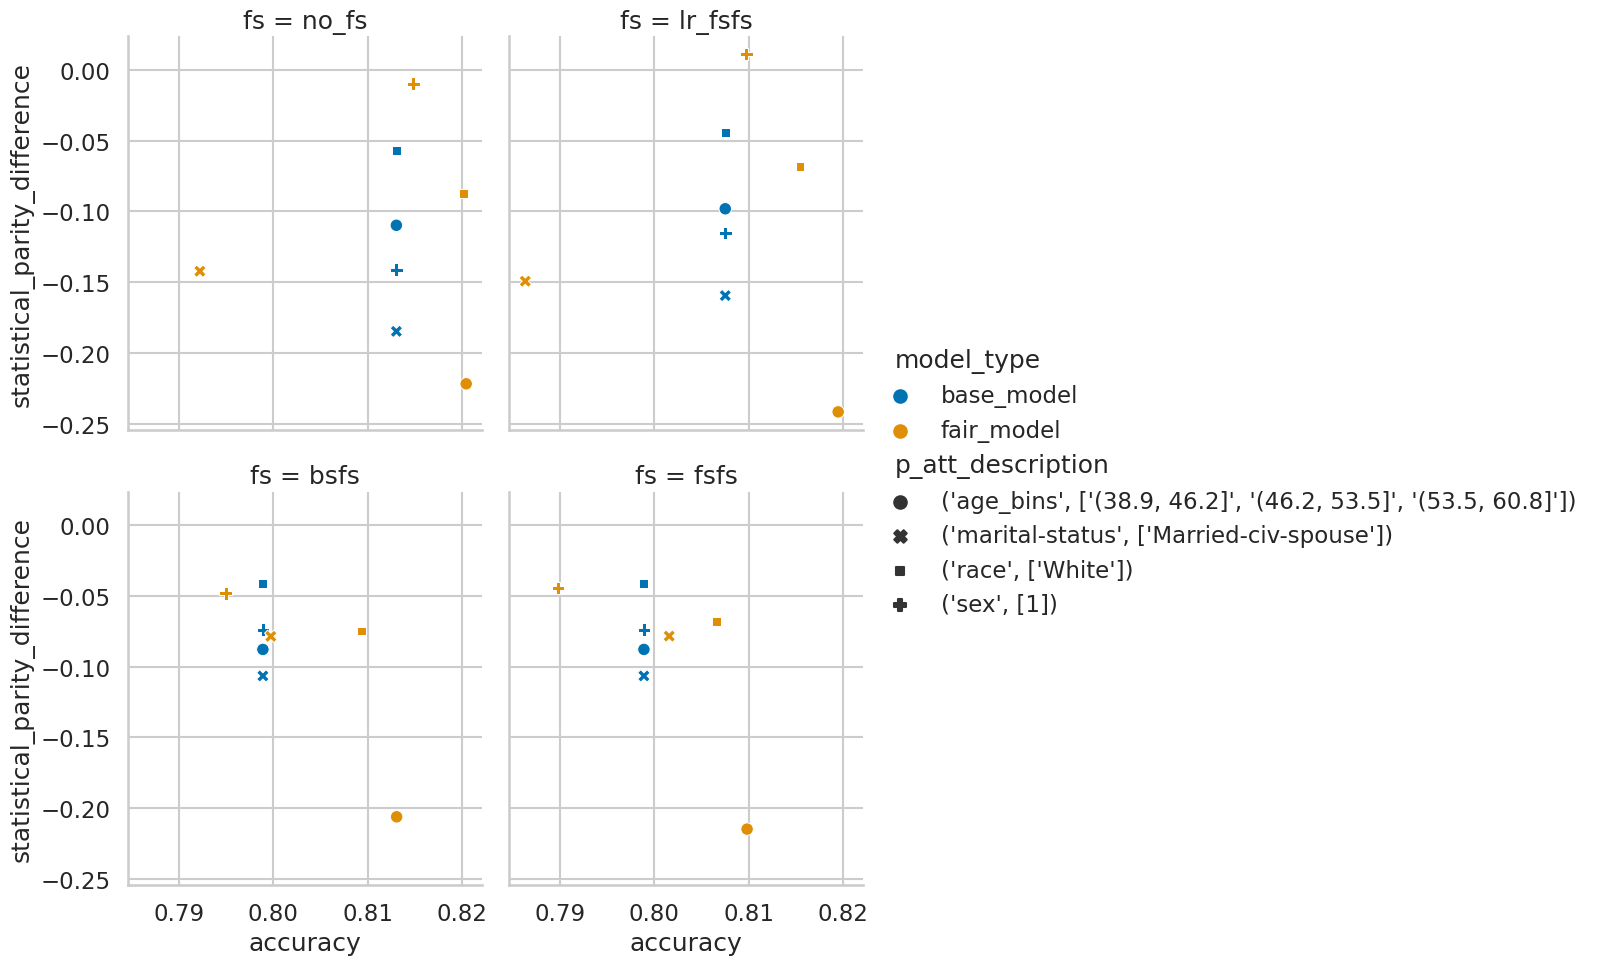

In [29]:
sp_adult_eta_10plot_bfsf_nofs_lrfs = sns.relplot(data = df, x = 'accuracy', y ='statistical_parity_difference', hue='model_type', 
            col = 'fs',style = 'p_att_description', col_order= ['no_fs','lr_fsfs','bsfs','fsfs'], col_wrap=2)
plt.savefig('sp_adult_eta_10plot_bfsf_nofs_lrfs.png')

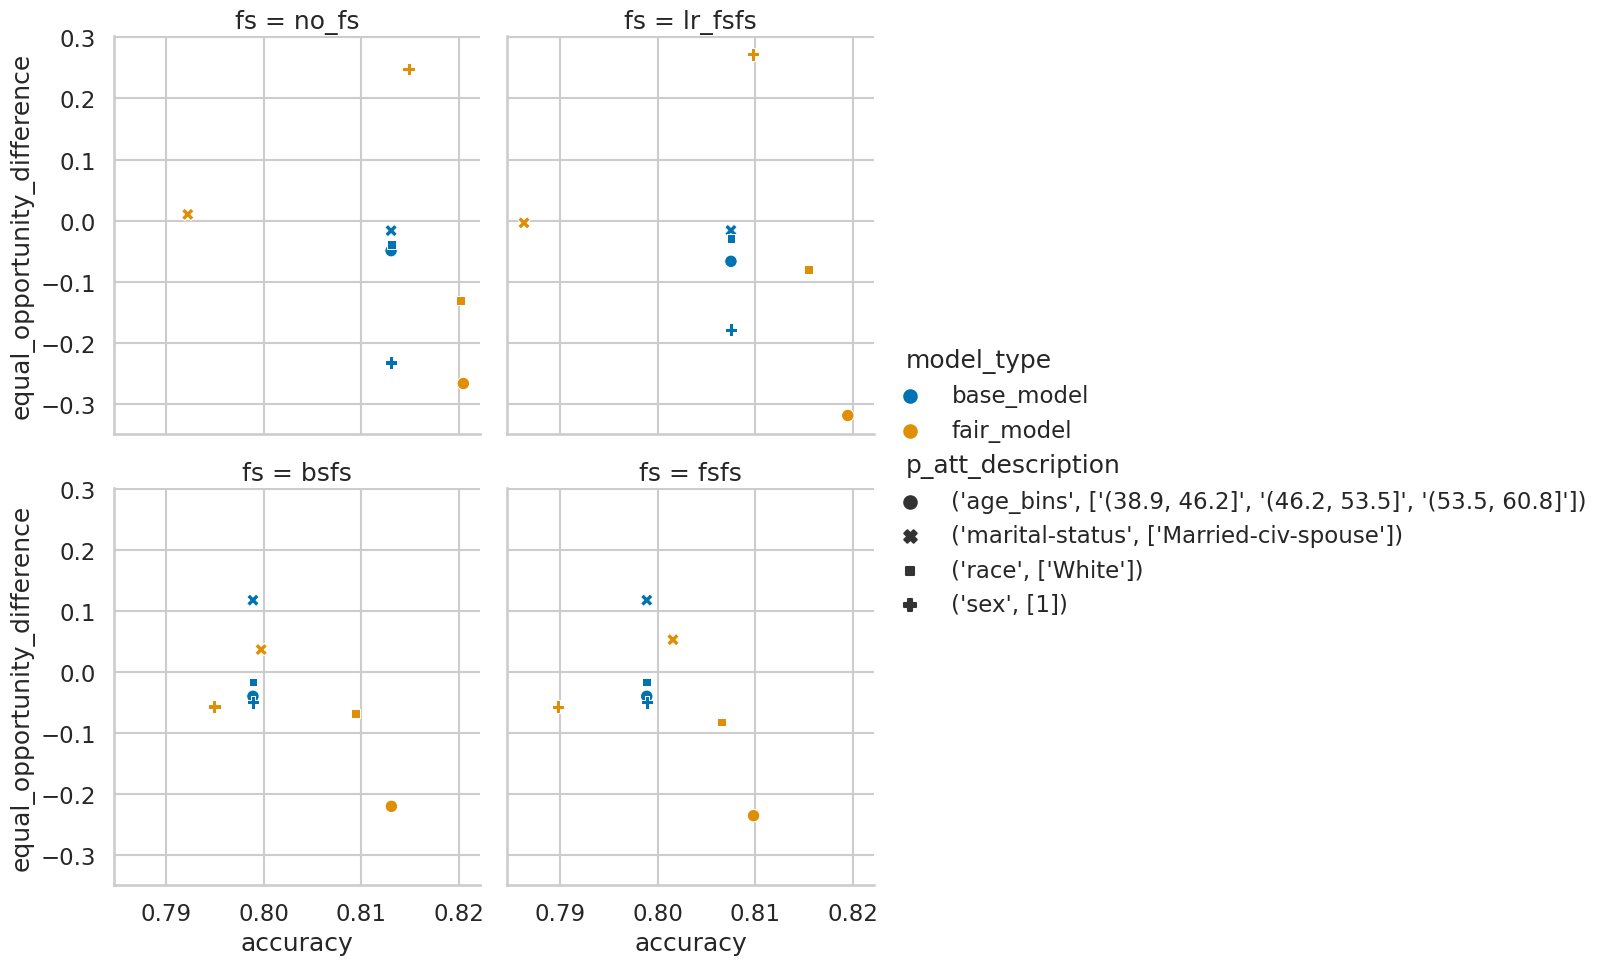

In [30]:
eo_adult_eta_10plot_bfsf_nofs_lrfs = sns.relplot(data = df, x = 'accuracy', y ='equal_opportunity_difference', hue='model_type', 
            col = 'fs',style = 'p_att_description', col_order= ['no_fs','lr_fsfs','bsfs','fsfs'], col_wrap=2)
plt.savefig('eo_adult_eta_10plot_bfsf_nofs_lrfs.png')


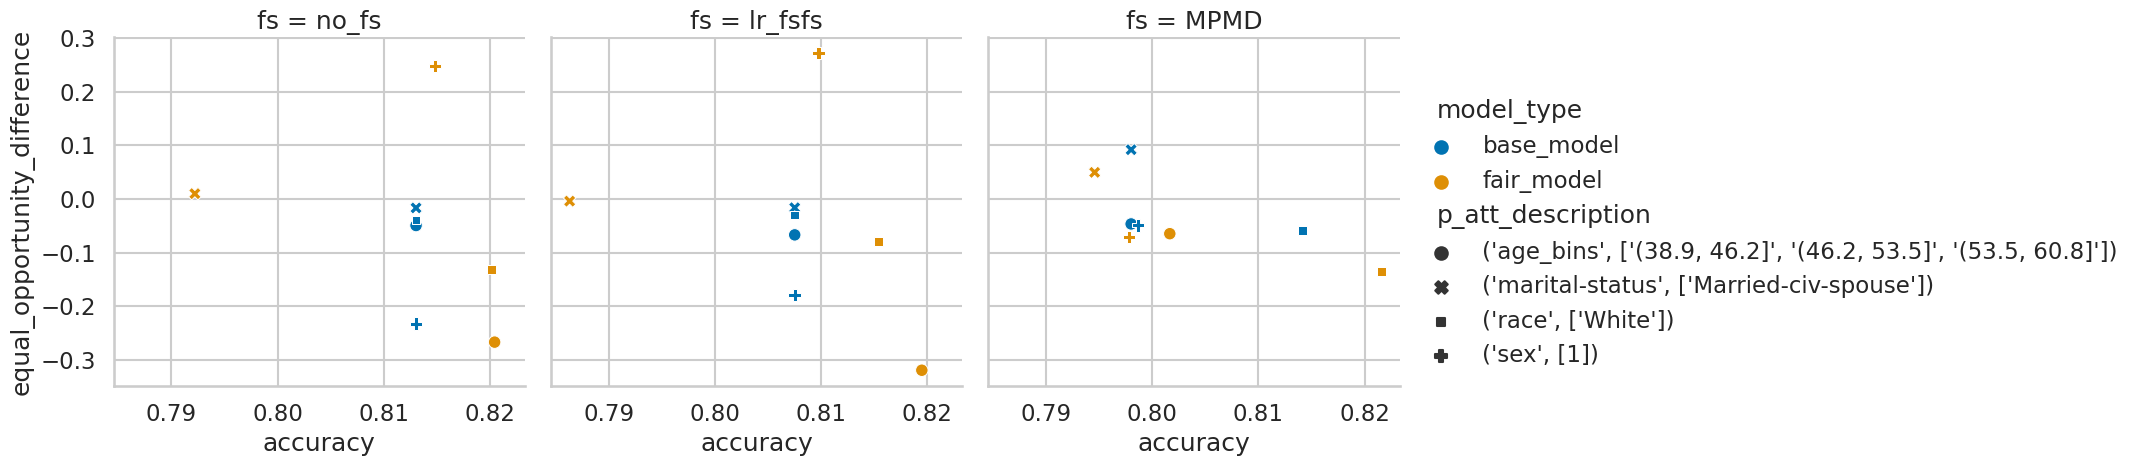

In [33]:
eo_adult_eta_10plot_mpmd_nofs_lrfs = sns.relplot(data = df, x = 'accuracy', y ='equal_opportunity_difference', hue='model_type', 
            col = 'fs',style = 'p_att_description', col_order= ['no_fs','lr_fsfs','MPMD'])
plt.savefig('eo_adult_eta_10plot_mpmd_nofs_lrfs.png')

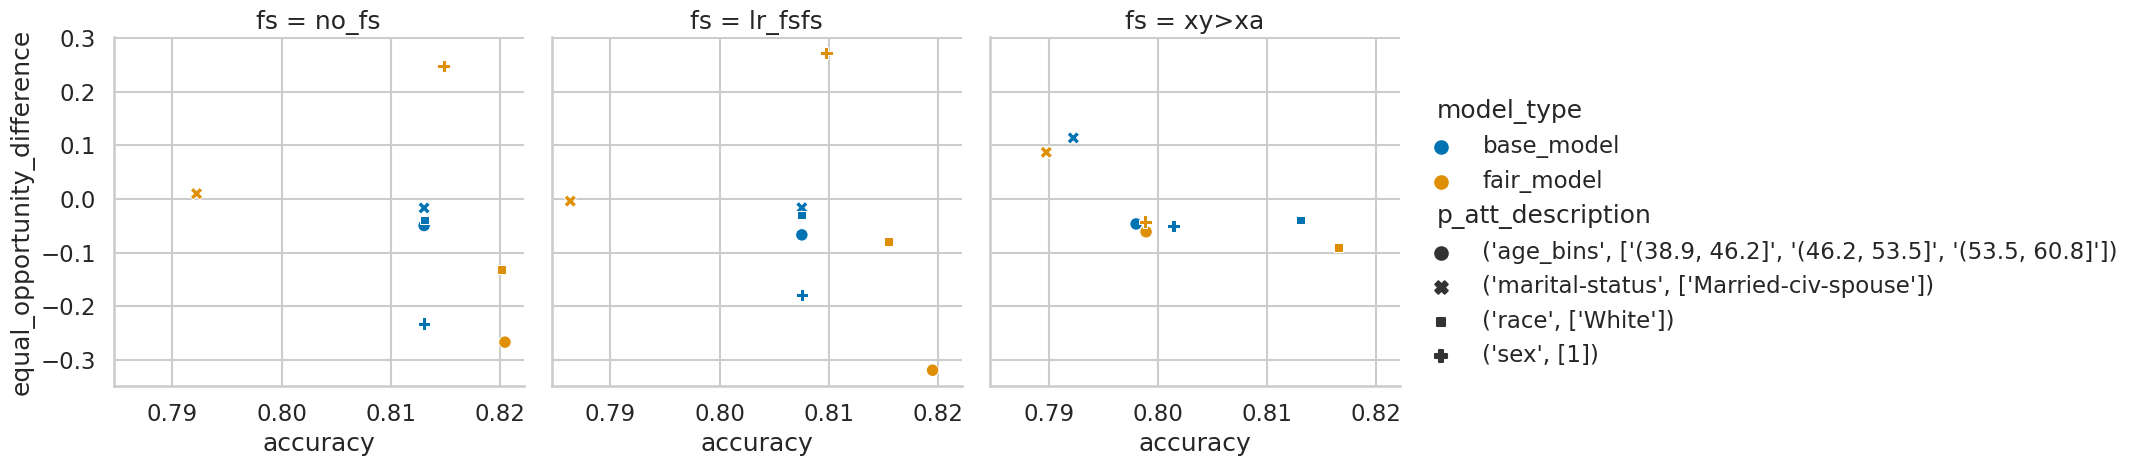

In [32]:
eo_adult_eta_10plot_xyxa_nofs_lrfs = sns.relplot(data = df, x = 'accuracy', y ='equal_opportunity_difference', hue='model_type', 
            col = 'fs',style = 'p_att_description', col_order= ['no_fs','lr_fsfs','xy>xa'])
plt.savefig('eo_adult_eta_10plot_xyxa_nofs_lrfs.png')